In [26]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ident = "0f7811"
ident = "8925d87"
# ident = "72449fe"

DATA = Path(".") / "data-tuning" / "dampersweep"
RUNS = list(DATA.glob("*.pkl.zip"))
ident = "e00d067923ae839d56bb4d07629063ea"
geodamps = [pd.read_pickle(f) for f in RUNS if ident in f.name]# and "-5.pkl.zip" in f.name]
assert len(geodamps) == 3
RUNS[:3]

[PosixPath('data-tuning/dampersweep/fca258fd9dc9bcb270426ead72aeb619-7.pkl.zip'),
 PosixPath('data-tuning/dampersweep/d2e09e6ce8657309d49c5cdf9409d4de-5.pkl.zip'),
 PosixPath('data-tuning/dampersweep/b47ab455cf21140d3bb6f9e4ec299b96-5.pkl.zip')]

In [13]:

def plot(df, axs, label=""):
    for i, loss in enumerate(["train_loss", "test_loss"]):
        for j, time in enumerate(["epochs", "model_updates"]):
            ax = df.plot(x=time, y=loss, ax=axs[i][j], legend=False)
            if "train" in loss:
                ax.set_ylim(0, 1)
            if "test" in loss:
                ax.set_ylim(1.2, 2)
            # if "updates" in time:
            #     ax.xaxis.set_major_formatter(lambda x, _: f"{int(x / 1e3)}K")
    for j, time in enumerate(["epochs", "model_updates"]):
        kwargs = dict(label=label) if j == 1 else dict(legend=False)
        ax = df.plot(x=time, y="batch_size_", ax=axs[j][2], **kwargs)
        if j == 1:
            ax.legend(loc=(1.05, 0))
        ax.set_yscale("log", base=2)
        # if "updates" in time:
        #     ax.xaxis.set_major_formatter(lambda x, _: f"{int(x / 1e3)}K")
    
    for ax in axs.flatten():
        ax.grid(alpha=0.4)
            
    # for j, time in enumerate(["epochs", "model_updates"]):

In [24]:
DATA = Path(".") / "data-tuning-tmp" / "dampersweep"
RUNS = list(DATA.glob("*.pkl.zip"))
print([f.name for f in RUNS])
# ident = "e00d067923ae839d56bb4d07629063ea"
seed = 2
padadamp =   pd.read_pickle(DATA / f"padadamp-tune-{seed}.pkl.zip")
padadamplr = pd.read_pickle(DATA / f"padadamplr-tune-{seed}.pkl.zip") 
# adadamp =    pd.read_pickle(DATA / f"adadampnn-tune-{seed}.pkl.zip")
# adadamplr =  pd.read_pickle(DATA / f"adadampnnlr-tune-{seed}.pkl.zip") 


['adadampnnlr-tune-2.pkl.zip', 'padadamplr-tune-2.pkl.zip', 'adadampnn-tune-2.pkl.zip', 'padadamp-tune-2.pkl.zip']


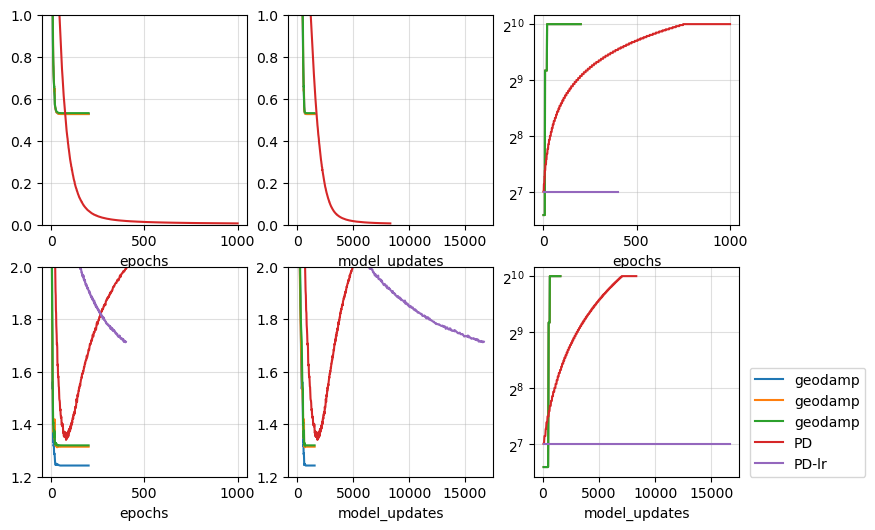

In [25]:
w = 3
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3 * w, 2 * w))
for base in geodamps:
    plot(base, axs, label="geodamp")

plot(padadamp, axs, label="PD")
plot(padadamplr, axs, label="PD-lr")
# plot(adadamp, axs, label="AD")
# plot(adadamplr, axs, label="AD-lr")